In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Things I did to clean the data.

- Removed two rows with missing values
- Converted duration from a string into an integer by stripping off "min"
    - Renamed column from Duration to Duration_min
- Expanded the "Stars" column containing a list of actors, into 4 separate columns in order to access each actor separately.
    - How I did it:
    - Only kept the first 2 actors in the data set and dropped the rest for simplicity.
Will explode the 

In [93]:
films = pd.read_csv('data/IMDb_Data_final.csv')

# data is from: https://www.kaggle.com/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022/data

In [3]:
films.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972


In [28]:
films.shape

(1000, 8)

In [29]:
films['ReleaseYear'].min(), films['ReleaseYear'].max()

(1920, 2022)

In [30]:
films['IMDb-Rating'].min(), films['IMDb-Rating'].max()

(7.6, 9.3)

In [19]:
films['Director'].value_counts().reset_index()

,Director,count
0,StevenSpielberg,13
1,AlfredHitchcock,13
2,AkiraKurosawa,11
3,HayaoMiyazaki,10
4,MartinScorsese,10
...,...,...
567,NicholasMeyer,1
568,"DonSiegel,",1
569,"TonyBancroft,",1
570,RobertMulligan,1


In [5]:
films[films['Stars'].str.contains('MyrnaLoy')]['Stars'].reset_index().style.set_properties(subset=['Stars'], **{'width': '300px'})

,index,Stars
0,570,"WilliamPowell, MyrnaLoy, ""MaureenOSullivan,"", NatPendleton"
1,659,"MyrnaLoy, DanaAndrews, FredricMarch, TeresaWright"


In [44]:
films['Stars'].str.strip().str.split(r'\s*,\s*', expand = True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,TomCruise,JenniferConnelly,MilesTeller,ValKilmer,None,None,None,None,None,None,None,None,None,None,None
1,,MichelleYeoh,StephanieHsu,KeHuyQuan,JamesHong,None,None,None,None,None,None,None,None,None,None
2,RobertPattinson,ZoëKravitz,JeffreyWright,ColinFarrell,None,None,None,None,None,None,None,None,None,None,None
3,SamNeill,LauraDern,JeffGoldblum,RichardAttenborough,None,None,None,None,None,None,None,None,None,None,None
4,MarlonBrando,AlPacino,JamesCaan,DianeKeaton,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,YilmazErdogan,DemetAkbag,AltanErkekli,CemYilmaz,None,None,None,None,None,None,None,None,None,None
996,AamirKhan,NaseeruddinShah,SonaliBendre,MukeshRishi,None,None,None,None,None,None,None,None,None,None,None
997,RajatBarmecha,RonitRoy,ManjotSingh,RamKapoor,None,None,None,None,None,None,None,None,None,None,None
998,Sridevi,AdilHussain,MehdiNebbou,PriyaAnand,None,None,None,None,None,None,None,None,None,None,None


In [31]:
films['Stars'] = films['Stars'].str.lstrip(', ').str.strip()

In [6]:
films['Stars'].str.split(r'\s*,\s*', expand = True, n=4).sample(20)

,0,1,2,3,4
440,CubaGoodingJr.,LaurenceFishburne,HudhailAl-Amir,LloydAveryII,None
327,,JackBlack,IanMcShane,AngelinaJolie,DustinHoffman
704,BrieLarson,FrantzTurner,JohnGallagherJr.,KaitlynDever,None
967,Mohanlal,Meena,AshaSharath,Ansiba,None
822,JudiDench,SteveCoogan,SophieKennedyClark,MareWinningham,None
543,ClintEastwood,LeeVanCleef,GianMariaVolontè,MaraKrupp,None
644,GeorgeC.Scott,KarlMalden,StephenYoung,MichaelStrong,None
393,NathanFillion,GinaTorres,ChiwetelEjiofor,AlanTudyk,None
987,PareshRawal,AkshayKumar,MithunChakraborty,MaheshManjrekar,None
55,SongKang-ho,Sun-kyunLee,ChoYeo-jeong,ChoiWoo-sik,None


In [17]:
films.query('Title == "Interstellar"')

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
22,Interstellar,ChristopherNolan,"MatthewMcConaughey, AnneHathaway, JessicaChast...",8.6,"Adventure,Drama,Sci-Fi",169min,UA,2014


In [33]:
cleaned = (
    films['Stars']
    .str.strip()                 # remove surrounding spaces
    .str.lstrip(', ')            # remove leading commas & spaces
    .str.rstrip(', '))            # remove trailing commas & spaces

films[['Actor1', 'Actor2', 'Actor3', 'Actor4']] = cleaned.str.split(r'\s*,\s*', expand=True, n=3)

#split_actors = split_actors.map(lambda x: x.strip() if isinstance(x, str) else x)  # strip spaces
#split_actors = split_actors.replace('', pd.NA)

#split_actors.columns = [f'Actor{i+1}' for i in range(split_actors.shape[1])]

#split_df.shape[1] automatically adapts to however many actors there are in the longest row.
#df = df.join(split_df)

# split_actors.rename(columns = {0:'Actor1', 1:'Actor2', 2:'Actor3', 3:'Actor4'})

# split_actors.sample(10)

In [34]:
films.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,Actor1,Actor2,Actor3,Actor4
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022,TomCruise,JenniferConnelly,MilesTeller,ValKilmer
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022,MichelleYeoh,StephanieHsu,KeHuyQuan,JamesHong
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022,RobertPattinson,ZoëKravitz,JeffreyWright,ColinFarrell
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993,SamNeill,LauraDern,JeffGoldblum,RichardAttenborough
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972,MarlonBrando,AlPacino,JamesCaan,DianeKeaton


In [35]:
films.columns

Index(['Title', 'Director', 'Stars', 'IMDb-Rating', 'Category', 'Duration',
       'Censor-board-rating', 'ReleaseYear', 'Actor1', 'Actor2', 'Actor3',
       'Actor4'],
      dtype='object')

In [46]:
df = films[['Title', 'Director','IMDb-Rating', 'Category', 'Duration', 'ReleaseYear', 'Actor1', 'Actor2']]
df.sample(10)

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
335,The Wild Bunch,SamPeckinpah,7.9,"Action,Adventure,Western",145min,1969,WilliamHolden,ErnestBorgnine
843,Cowboy Bebop: Tengoku no tobira,"""ShinichirôWatanabe,""",7.8,"Animation,Action,Crime",115min,2001,HiroyukiOkiura,YoshiyukiTakei
355,Blood Diamond,EdwardZwick,8.0,"Adventure,Drama,Thriller",143min,2006,LeonardoDiCaprio,DjimonHounsou
787,Lagaan: Once Upon a Time in India,AshutoshGowariker,8.1,"Drama,Musical,Sport",224min,2001,AamirKhan,RaghuvirYadav
868,Il postino,"MichaelRadford,",7.7,"Biography,Comedy,Drama",108min,1994,MassimoTroisi,PhilippeNoiret
178,Moana,"RonClements,",7.6,"Animation,Adventure,Comedy",107min,2016,DonHall,ChrisWilliams
908,Okuribito,YôjirôTakita,8.0,"Drama,Music",130min,2008,MasahiroMotoki,RyôkoHirosue
855,Shine,ScottHicks,7.7,"Biography,Drama,Music",105min,1996,GeoffreyRush,ArminMueller-Stahl
584,Ordinary People,RobertRedford,7.7,Drama,124min,1980,DonaldSutherland,MaryTylerMoore
827,The Lost Weekend,BillyWilder,7.9,"Drama,Film-Noir",101min,1945,RayMilland,JaneWyman


In [48]:
df.isna().sum()

Title          0
Director       0
IMDb-Rating    0
Category       1
Duration       1
ReleaseYear    0
Actor1         0
Actor2         0
dtype: int64

In [49]:
df.query('Category == "NaN"')

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2


In [50]:
df[df['Category'].isnull()]

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
639,Chun gwong cha sit,Kar-WaiWong,7.7,NaN,"Drama,Romance",1997,LeslieCheung,TonyChiu-WaiLeung


In [51]:
df[df['Duration'].isnull()]

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
785,Ayla: The Daughter of War,"CanUlkay,",8.3,"Biography,Drama,History",NaN,2017,ÇetinTekindor,IsmailHacioglu


In [52]:
df = df.dropna().reset_index(drop=True)

In [59]:
df[df['Actor2'] == '"']

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
344,Lawrence of Arabia,DavidLean,8.3,"Adventure,Biography,Drama",218min,1962,"""PeterOToole",""""
354,Beauty and the Beast,"GaryTrousdale,",8.0,"Animation,Family,Fantasy",84min,1991,"""PaigeOHara",""""
358,Straight Outta Compton,F.GaryGray,7.8,"Biography,Drama,History",147min,2015,"""OSheaJacksonJr.",""""
466,Barry Lyndon,StanleyKubrick,8.1,"Adventure,Drama,War",185min,1975,"""RyanONeal",""""
527,Paper Moon,PeterBogdanovich,8.1,"Comedy,Crime,Drama",102min,1973,"""RyanONeal",""""
593,Clerks,KevinSmith,7.7,Comedy,92min,1994,"""BrianOHalloran",""""
769,The Lion in Winter,AnthonyHarvey,7.9,"Biography,Drama,History",134min,1968,"""PeterOToole",""""
834,Underground,EmirKusturica,8.1,"Comedy,Drama,Fantasy",170min,1995,"""PredragMikiManojlovic",""""
870,Sunrise: A Song of Two Humans,F.W.Murnau,8.1,"Drama,Romance",94min,1927,"""GeorgeOBrien",""""


In [60]:
df = df.replace('"', np.nan)

In [61]:
df.loc[344]

Title                 Lawrence of Arabia
Director                       DavidLean
IMDb-Rating                          8.3
Category       Adventure,Biography,Drama
Duration                          218min
ReleaseYear                         1962
Actor1                      "PeterOToole
Actor2                               NaN
Name: 344, dtype: object

In [62]:
df[df['Actor1'].str.contains('PeterOToole')]

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
344,Lawrence of Arabia,DavidLean,8.3,"Adventure,Biography,Drama",218min,1962,"""PeterOToole",NaN
769,The Lion in Winter,AnthonyHarvey,7.9,"Biography,Drama,History",134min,1968,"""PeterOToole",NaN


In [63]:
df.head(6)

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
0,Top Gun: Maverick,JosephKosinski,8.6,"Action,Drama",130min,2022,TomCruise,JenniferConnelly
1,Everything Everywhere All at Once,"DanKwan,",8.3,"Action,Adventure,Comedy",139min,2022,MichelleYeoh,StephanieHsu
2,The Batman,MattReeves,7.9,"Action,Crime,Drama",176min,2022,RobertPattinson,ZoëKravitz
3,Jurassic Park,StevenSpielberg,8.2,"Action,Adventure,Sci-Fi",127min,1993,SamNeill,LauraDern
4,The Godfather,FrancisFordCoppola,9.2,"Crime,Drama",175min,1972,MarlonBrando,AlPacino
5,Spider-Man: No Way Home,JonWatts,8.3,"Action,Adventure,Fantasy",148min,2021,TomHolland,Zendaya


<Axes: xlabel='ReleaseYear'>

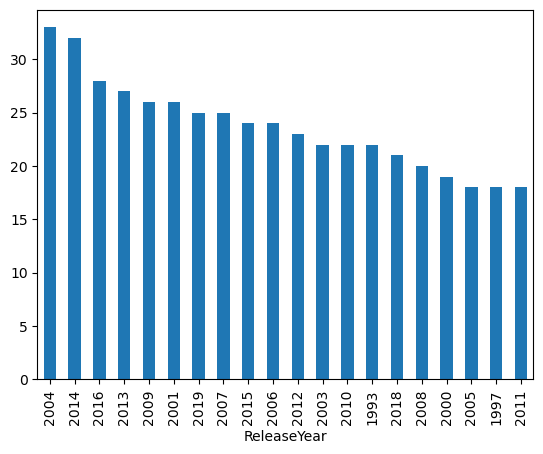

In [71]:
df['ReleaseYear'].value_counts().head(20).plot(kind='bar')

In [77]:
df.shape

(998, 8)

In [78]:
df[df['Duration'].str.contains("min")]
# all values for duration are in minutes so will remove min from the value in order to store it as an integer.

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
0,Top Gun: Maverick,JosephKosinski,8.6,"Action,Drama",130min,2022,TomCruise,JenniferConnelly
1,Everything Everywhere All at Once,"DanKwan,",8.3,"Action,Adventure,Comedy",139min,2022,MichelleYeoh,StephanieHsu
2,The Batman,MattReeves,7.9,"Action,Crime,Drama",176min,2022,RobertPattinson,ZoëKravitz
3,Jurassic Park,StevenSpielberg,8.2,"Action,Adventure,Sci-Fi",127min,1993,SamNeill,LauraDern
4,The Godfather,FrancisFordCoppola,9.2,"Crime,Drama",175min,1972,MarlonBrando,AlPacino
...,...,...,...,...,...,...,...,...
993,Vizontele,"YilmazErdogan,",8.0,"Comedy,Drama",110min,2001,YilmazErdogan,DemetAkbag
994,Sarfarosh,JohnMathewMatthan,8.1,"Action,Drama,Thriller",174min,1999,AamirKhan,NaseeruddinShah
995,Udaan,VikramadityaMotwane,8.1,Drama,134min,2010,RajatBarmecha,RonitRoy
996,English Vinglish,GauriShinde,7.8,"Comedy,Drama,Family",134min,2012,Sridevi,AdilHussain


In [79]:
df['Duration'] = df['Duration'].str.replace("min", "", regex=False).astype(int)

# removing the min part and turning type from string into integer

In [80]:
df.head(4)

,Title,Director,IMDb-Rating,Category,Duration,ReleaseYear,Actor1,Actor2
0,Top Gun: Maverick,JosephKosinski,8.6,"Action,Drama",130,2022,TomCruise,JenniferConnelly
1,Everything Everywhere All at Once,"DanKwan,",8.3,"Action,Adventure,Comedy",139,2022,MichelleYeoh,StephanieHsu
2,The Batman,MattReeves,7.9,"Action,Crime,Drama",176,2022,RobertPattinson,ZoëKravitz
3,Jurassic Park,StevenSpielberg,8.2,"Action,Adventure,Sci-Fi",127,1993,SamNeill,LauraDern


In [83]:
df = df.rename(columns = {'Duration':'Duration_min'})

# renaming column by selecting the entire dataframe and supplying a dictionary of current name and new name.

In [82]:
df

,Title,Director,IMDb-Rating,Category,Duration_min,ReleaseYear,Actor1,Actor2
0,Top Gun: Maverick,JosephKosinski,8.6,"Action,Drama",130,2022,TomCruise,JenniferConnelly
1,Everything Everywhere All at Once,"DanKwan,",8.3,"Action,Adventure,Comedy",139,2022,MichelleYeoh,StephanieHsu
2,The Batman,MattReeves,7.9,"Action,Crime,Drama",176,2022,RobertPattinson,ZoëKravitz
3,Jurassic Park,StevenSpielberg,8.2,"Action,Adventure,Sci-Fi",127,1993,SamNeill,LauraDern
4,The Godfather,FrancisFordCoppola,9.2,"Crime,Drama",175,1972,MarlonBrando,AlPacino
...,...,...,...,...,...,...,...,...
993,Vizontele,"YilmazErdogan,",8.0,"Comedy,Drama",110,2001,YilmazErdogan,DemetAkbag
994,Sarfarosh,JohnMathewMatthan,8.1,"Action,Drama,Thriller",174,1999,AamirKhan,NaseeruddinShah
995,Udaan,VikramadityaMotwane,8.1,Drama,134,2010,RajatBarmecha,RonitRoy
996,English Vinglish,GauriShinde,7.8,"Comedy,Drama,Family",134,2012,Sridevi,AdilHussain


In [76]:
# df["Duration"] = df["Duration"].astype(int)

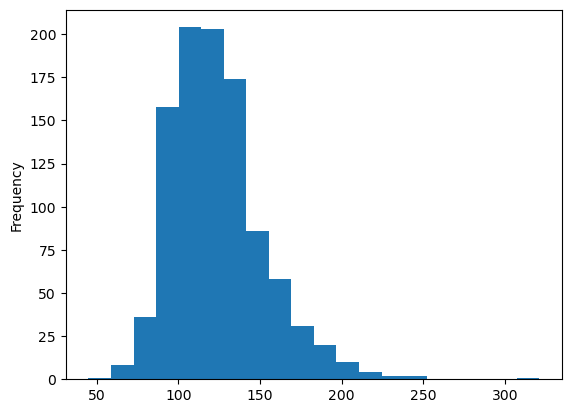

In [86]:
df['Duration_min'].plot(kind = 'hist', bins=20)
plt.show()

In [88]:
df['Duration_min'].describe()

count    998.000000
mean     123.729459
std       28.538611
min       45.000000
25%      103.000000
50%      120.000000
75%      138.000000
max      321.000000
Name: Duration_min, dtype: float64

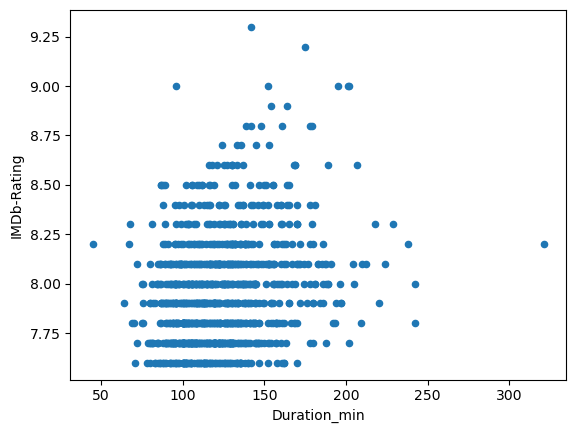

In [90]:
df.plot(kind = 'scatter',
       x = 'Duration_min',
       y = 'IMDb-Rating')
plt.show()

<Axes: xlabel='Duration_min', ylabel='IMDb-Rating'>

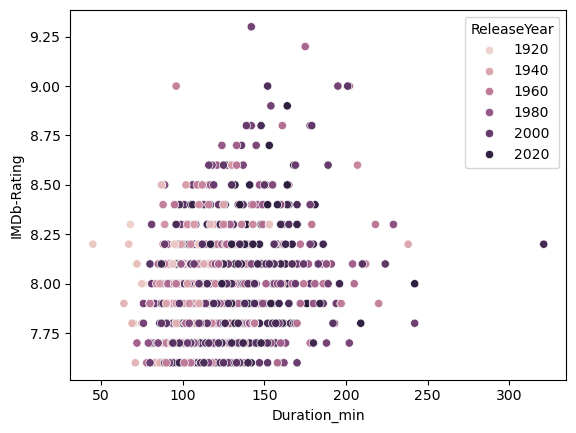

In [91]:
sns.scatterplot(
    x = 'Duration_min',
    y = 'IMDb-Rating',
    hue = 'ReleaseYear',
    data = df
)

In [95]:
df.groupby("Category")["IMDb-Rating"].mean().reset_index()

,Category,IMDb-Rating
0,"Action,Adventure",8.300000
1,"Action,Adventure,Biography",7.900000
2,"Action,Adventure,Comedy",7.954545
3,"Action,Adventure,Crime",7.600000
4,"Action,Adventure,Drama",8.106250
...,...,...
197,"Mystery,Romance,Thriller",8.300000
198,"Mystery,Sci-Fi,Thriller",8.000000
199,"Mystery,Thriller",8.100000
200,Thriller,7.700000
